# Логистическая регрессия

In [1]:
# Логистическая регрессия - метод, который позволяет исследовать взаимосвязи между
# номинативной зависимой переменной (ЗП) и различными предикторами.

# Уравнение логистической регрессии:

\begin{equation}
log(odds) = B_0 + B_1 x_1 + B_2 x_2 + ... + B_k x_k
\end{equation}

In [2]:
# log - натуральный логарифм.
# odds - шансы положительного исхода (далее просто "шансы").

\begin{equation}
p = \frac{e^{log(odds)}}{1 + e^{log(odds)}} = \frac{exp(log(odds))}{1 + exp(log(odds))}
\end{equation}

In [3]:
# p - вероятность положительного исхода (далее просто "вероятность").

## Шансы и вероятность

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
# Разберем на примере подбрасывания монетки. Пусть у нас было 10 бросков и мы получили следующие результаты:
# 1 - орел (в примере мы хотим, чтобы выпадали орлы, это будет положительный исход)
# 0 - решка (отрицательный исход)

df = pd.DataFrame({'coin_state': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]})
df

,coin_state
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [6]:
# 2 орла, 8 решек
df.coin_state.value_counts()

0    8
1    2
Name: coin_state, dtype: int64

In [7]:
# Рассчитаем вероятность:

\begin{equation}
p = \frac{pos}{pos + neg}
\end{equation}  

In [8]:
pos = df.coin_state.value_counts()[1]   # количество положительных исходов
neg = df.coin_state.value_counts()[0]   # количество отрицательных исходов

p = pos / (pos + neg)
p

0.2

In [9]:
# Рассчитаем шансы:

\begin{equation}
odds = \frac{pos}{neg}
\end{equation}

In [10]:
odds = pos / neg
odds

0.25

In [11]:
# Шансы можно посчитать, зная вероятность:

\begin{equation}
odds = \frac{p}{1 - p}
\end{equation}

In [12]:
p / (1 - p)

0.25

In [13]:
# Вероятность можно посчитать, зная шансы:

\begin{equation}
p = \frac{odds}{1 + odds}
\end{equation}

In [14]:
odds / (1 + odds)

0.2

## При чем тут натуральный логарифм?

In [15]:
# Проследим за различным соотношением положительных и отрицательных исходов
# и рассчитанными на их основе вероятностью, шансами и натуральным логарифмом шансов (далее просто "логарифм шансов").

# Вероятность     - число от нуля до единицы
# Шансы           - число от нуля до плюс бесконечности
# Логарифм шансов - число от минус бесконечности до плюс бесконечности

In [16]:
pd.DataFrame({
    'pos': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'neg': [10, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0],
    'p': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'odds': [0, 0.11, 0.25, 0.43, 0.66, 1, 1.5, 2.33, 4, 9, np.nan],
    'log(odds)': [np.nan, -2.2, -1.39, -0.85, -0.41, 0, 0.41, 0.85, 1.39, 2.2, np.nan],
})

,pos,neg,p,odds,log(odds)
0,0,10,0.0,0.00,NaN
1,1,0,0.1,0.11,-2.20
2,2,8,0.2,0.25,-1.39
3,3,7,0.3,0.43,-0.85
4,4,6,0.4,0.66,-0.41
5,5,5,0.5,1.00,0.00
6,6,4,0.6,1.50,0.41
7,7,3,0.7,2.33,0.85
8,8,2,0.8,4.00,1.39
9,9,1,0.9,9.00,2.20


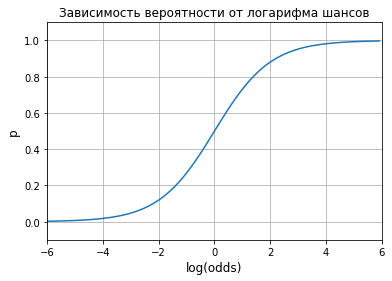

In [17]:
# Вспомним уравнение логистической регрессии - в правой части число от минус бесконечности до плюс бесконечности,
# в левой - логарифм шансов, зная который, мы можем рассчитать вероятность.

# Визуализируем зависимость вероятности от логарифма шансов:

log_odds = np.arange(-6, 6, 0.1)
p = np.exp(log_odds) / (1 + np.exp(log_odds))

plt.plot(log_odds, p)
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.title('Зависимость вероятности от логарифма шансов', fontsize=12)
plt.xlabel('log(odds)', fontsize=12)
plt.ylabel('p', fontsize=12)

plt.show()
plt.close()

## Модель без предикторов

In [18]:
# Датасет Титаника

df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
glm_binomial = smf.glm(formula='Survived ~ 1', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept - логарифм шансов (шансов выжить)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Tue, 08 Jun 2021   Deviance:                       964.52
Time:                        20:53:33   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

In [20]:
# Получаем модель:
# log(odds) = -0.3799

In [21]:
# Распределение частот ЗП
df.Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

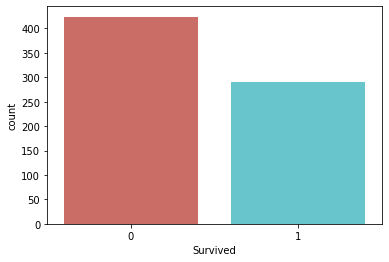

In [22]:
sns.countplot(x='Survived', data=df, palette='hls')

In [23]:
# df.Survived.value_counts()[1] - количество выживших 290
# df.Survived.value_counts()[0] - количество погибших 424
odds = df.Survived.value_counts()[1] / df.Survived.value_counts()[0]
odds

0.6839622641509434

In [24]:
# Логарифм шансов - это и есть Intercept.
log_odds = np.log(odds)
log_odds

-0.37985253225143806

In [25]:
# Рассчитаем шансы:
odds = np.exp(log_odds)
odds

0.6839622641509434

In [26]:
# Рассчитаем вероятность:
p = odds / (1 + odds)
p

0.4061624649859944

In [27]:
# aic - показатель остатков модели.
# Чем он ниже, тем лучше модель (по аналогии с суммой квадратов остатков в линейной регрессии).
glm_binomial.aic

966.5159648555248

## Модель с одним номинативным предиктором

In [28]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex)', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept      - логарифм шансов для женщин
# C(Sex)[T.male] - логарифм отношения шансов для мужчин к шансам для женщин

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Tue, 08 Jun 2021   Deviance:                       750.70
Time:                        20:53:34   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1243      0.144      7.814      0.000       0.842       1.406
C(Sex)[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
==================================================================================
"""

In [29]:
# Таблица сопряженности между переменными выжил/не выжил и пол
cross_table = pd.crosstab(df.Survived, df.Sex)
cross_table

Sex,female,male
Survived,,
0,64,360
1,197,93


Text(0, 0.5, 'Количество')

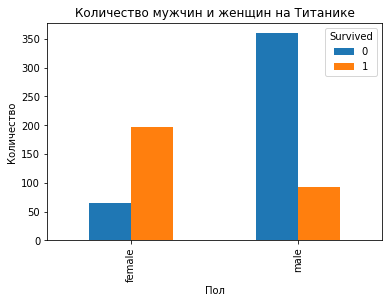

In [30]:
# Визуализировать таблицу сопряженности можно так:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')
plt.title('Количество мужчин и женщин на Титанике')
plt.xlabel('Пол')
plt.ylabel('Количество')

In [31]:
# cross_table.female[0] - количество погибших женщин
# cross_table.female[1] - количество выживших женщин
odds_female = cross_table.female[1] / cross_table.female[0]
odds_female

3.078125

In [32]:
# Логарифм шансов для женщин - это и есть Intercept
np.log(odds_female)

1.1243206453783166

In [33]:
# cross_table.male[0] - количество погибших мужчин
# cross_table.male[1] - количество выживших мужчин
odds_male = cross_table.male[1] / cross_table.male[0]
odds_male

0.25833333333333336

In [34]:
odds_ratio = odds_male / odds_female
odds_ratio

0.08392554991539763

In [35]:
np.log(odds_ratio)
# Логарифм отношения шансов для мужчин к шансам для женщин - это и есть значение C(Sex)[T.male]

-2.4778251836752165

In [36]:
# Получаем модель:
# log(odds) = 1.1243 - (2.4778 * Sex_male)

# Если предсказываем логарифм шансов для женщин (Sex_male = 0):
# log(odds) = 1.1243 - (2.4778 * 0)
# log(odds) = 1.1243

# Если предсказываем логарифм шансов для мужчин (Sex_male = 1):
# log(odds) = 1.1243 - (2.4778 * 1)
# log(odds) = 1.1243 - 2.4778
# log(odds) -1.3535

log_odds_male = 1.1243 - 2.4778
log_odds_male

-1.3534999999999997

In [37]:
# aic у этой модели ниже, чем у предыдущей, значит эта модель лучше.
glm_binomial.aic

754.7002061466517

## Модель с двумя номинативными предикторами

In [38]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex) * C(Pclass)', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept      - логарифм шансов для Ж в 1кл
# C(Sex)[T.male] - логарифм отношения шансов для М в 1кл к шансам Ж в 1кл
# C(Pclass)[T.2] - логарифм отношения шансов для Ж во 2кл к шансам Ж в 1кл
# C(Pclass)[T.3] - логарифм отношения шансов для Ж в 3кл к шансам Ж в 1кл
# C(Sex)[T.male]:C(Pclass)[T.2] - разность логарифмов отношения шансов, рассчитанных для М/Ж во 2кл и М/Ж в 1кл
# C(Sex)[T.male]:C(Pclass)[T.3] - разность логарифмов отношения шансов, рассчитанных для М/Ж во 3кл и М/Ж в 1кл

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      708
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.14
Date:                Tue, 08 Jun 2021   Deviance:                       642.28
Time:                        20:53:34   Pearson chi2:                     714.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.3081      0.588      5.628      0.000       2.156       4.460
C(Sex)[T.male]                   -3.7301      0.622     -5.997      0.000      -4.949      -2.511
C(Pclass)[T.2]                   -0.8804      0.726     -1.213      0.225      -2.303       0.542
C(Pclass)[T.3]                   -3.4653      0.620     -5.585      0.000      -4.681      -2.249
C(Sex)[T.male]:C(Pclass)[T.2]    -0.4204      0.804     -0.523      0.601      -1.997       1.156
C(Sex)[T.male]:C(Pclass)[T.3]     2.1542      0.676      3.185      0.001       0.829       3.480
=================================================================================================
"""

In [39]:
# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для женщин.
cross_table_female = pd.crosstab(df[df.Sex == 'female'].Survived, df.Pclass)
cross_table_female

Pclass,1,2,3
Survived,,,
0,3,6,55
1,82,68,47


Text(0, 0.5, 'Количество')

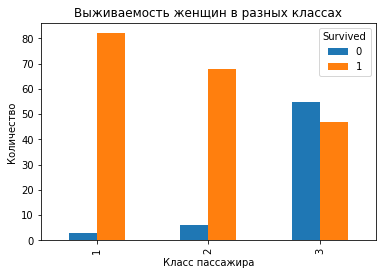

In [40]:
pd.crosstab(df.Pclass[df.Sex == 'female'], df.Survived).plot(kind='bar')
plt.title('Выживаемость женщин в разных классах')
plt.xlabel('Класс пассажира')
plt.ylabel('Количество')

In [41]:
# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для мужчин.
cross_table_male = pd.crosstab(df[df.Sex == 'male'].Survived, df.Pclass)
cross_table_male

Pclass,1,2,3
Survived,,,
0,61,84,215
1,40,15,38


Text(0, 0.5, 'Количество')

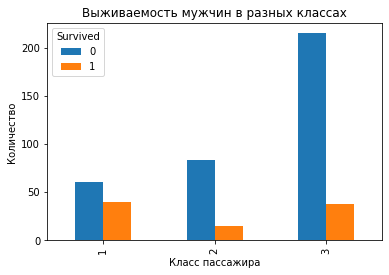

In [42]:
pd.crosstab(df.Pclass[df.Sex == 'male'], df.Survived).plot(kind='bar')
plt.title('Выживаемость мужчин в разных классах')
plt.xlabel('Класс пассажира')
plt.ylabel('Количество')

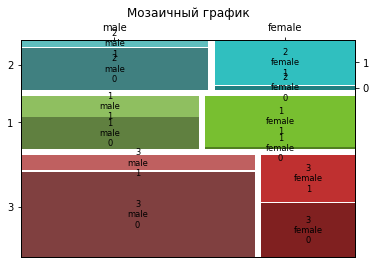

In [43]:
# График сопряженности между классом пассажира, полом и переменной выжил/не выжил.

from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Pclass', 'Sex', 'Survived'], title='Мозаичный график', horizontal=0, gap=0.03)
plt.show()

In [44]:
odds_female_pc1 = cross_table_female[1][1] / cross_table_female[1][0]
odds_female_pc1

27.333333333333332

In [45]:
np.log(odds_female_pc1)
# Это значение Intercept

3.3081069585961433

In [46]:
odds_male_pc1 = cross_table_male[1][1] / cross_table_male[1][0]
odds_male_pc1

0.6557377049180327

In [47]:
np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]

-3.7301013686555184

In [48]:
odds_female_pc2 = cross_table_female[2][1] / cross_table_female[2][0]
odds_female_pc2

11.333333333333334

In [49]:
np.log(odds_female_pc2 / odds_female_pc1)
# Это значение C(Pclass)[T.2]

-0.8803587226480917

In [50]:
odds_female_pc3 = cross_table_female[3][1] / cross_table_female[3][0]
odds_female_pc3

0.8545454545454545

In [51]:
np.log(odds_female_pc3 / odds_female_pc1)
# Это значение C(Pclass)[T.3]

-3.4652925421185556

In [52]:
odds_male_pc2 = cross_table_male[2][1] / cross_table_male[2][0]
odds_male_pc2

0.17857142857142858

In [53]:
np.log(odds_male_pc2 / odds_female_pc2) - np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]:C(Pclass)[T.2]

-0.42041346503363686

In [54]:
odds_male_pc3 = cross_table_male[3][1] / cross_table_male[3][0]
odds_male_pc3

0.17674418604651163

In [55]:
np.log(odds_male_pc3 / odds_female_pc3) - np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]:C(Pclass)[T.3]

2.154235083776654

In [56]:
# Получаем модель:
# log(odds) = 3.3081 - (3.7301 * Sex_male) - (0.8804 * Pclass2) - (3.4653 * Pclass3) - (0.4204 * Sex_male * Pclass2) + (2.1542 * Sex_male * Pclass3)

# Если предсказываем логарифм шансов для Ж в 1кл (Sex_male = 0, Pclass2 = 0, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 0) - (3.4653 * 0) - (0.4204 * 0 * 0) + (2.1542 * 0 * 0)
# log(odds) = 3.3081

# Если предсказываем логарифм шансов для М в 1кл (Sex_male = 1, Pclass2 = 0, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 0) - (3.4653 * 0) - (0.4204 * 1 * 0) + (2.1542 * 1 * 0)
# log(odds) = 3.3081 - 3.7301
# log(odds) = -0.422

log_odds_male = 3.3081 - 3.7301
log_odds_male

-0.42200000000000015

In [57]:
# Если предсказываем логарифм шансов для Ж во 2кл (Sex_male = 0, Pclass2 = 1, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 1) - (3.4653 * 0) - (0.4204 * 0 * 1) + (2.1542 * 0 * 0)
# log(odds) = 3.3081 - 0.8804
# log(odds) = 2.4277

log_odds_female_pc2 = 3.3081 - 0.8804
log_odds_female_pc2

2.4277

In [58]:
# Если предсказываем логарифм шансов для Ж в 3кл (Sex_male = 0, Pclass2 = 0, Pclass3 = 1):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 0) - (3.4653 * 1) - (0.4204 * 0 * 0) + (2.1542 * 0 * 1)
# log(odds) = 3.3081 - 3.4653
# log(odds) = -0.1572

log_odds_female_pc3 = 3.3081 - 3.4653
log_odds_female_pc3

-0.1572

In [59]:
# Если предсказываем логарифм шансов для М во 2кл (Sex_male = 1, Pclass2 = 1, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 1) - (3.4653 * 0) - (0.4204 * 1 * 1) + (2.1542 * 1 * 0)
# log(odds) = 3.3081 - 3.7301 - 0.8804 - 0.4204
# log(odds) = -1.7228

log_odds_male_pc2 = 3.3081 - 3.7301 - 0.8804 - 0.4204
log_odds_male_pc2

-1.7227999999999999

In [60]:
# Если предсказываем логарифм шансов для М в 3кл (Sex_male = 1, Pclass2 = 0, Pclass3 = 1):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 0) - (3.4653 * 1) - (0.4204 * 1 * 0) + (2.1542 * 1 * 1)
# log(odds) = 3.3081 - 3.7301 - 3.4653 + 2.1542
# log(odds) = -1.7331

log_odds_male_pc3 = 3.3081 - 3.7301 - 3.4653 + 2.1542
log_odds_male_pc3

-1.7331000000000003

In [61]:
# aic у этой модели ниже, чем у двух предыдущих, значит эта модель лучше.
glm_binomial.aic

654.2750443468178

## Комбинация предикторов разного типа

In [62]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex) + C(Pclass) + Age', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept - логарифм шансов для Ж в 1кл при условии, что их возраст равен нулю.
# Age - коэффициент при возрасте показывает,
# на сколько изменяется логарифм шансов для базового уровня при единичном изменении возраста.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Tue, 08 Jun 2021   Deviance:                       647.28
Time:                        20:53:35   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
C(Sex)[T.male]    -2.5228      0.207    -12.164      0.000      -2.929      -2.116
C(Pclass)[T.2]    -1.3098      0.278     -4.710      0.000      -1.855      -0.765
C(Pclass)[T.3]    -2.5806      0.281     -9.169      0.000      -3.132      -2.029
Age               -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==================================================================================
"""

In [63]:
# Получаем модель:
# log(odds) = 3.7770 - (2.5228 * Sex_male) - (1.3098 * Pclass2) - (2.5806 * Pclass3) - (0.0370 * Age)

# Если предсказываем логарифм шансов для Ж в 1кл в возрасте 20 лет:
# log(odds) = 3.7770 - (2.5228 * 0) - (1.3098 * 0) - (2.5806 * 0) - (0.0370 * 20)
# log(odds) = 3.7770 - (0.0370 * 20)
# log(odds) = 3.037

3.7770 - (0.0370 * 20)

3.037

In [64]:
# Кстати, модель без учета возраста была лучше.
glm_binomial.aic

657.2831255018241